In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import pandas as pd 

path = os.getcwd()
path = os.path.join(path, 'drive','MyDrive','NMDS')

In [ ]:
file_paths = [os.path.join(path, file_name) for file_name in os.listdir(path)[:-1]]
file_names = [name.split('.')[0] for name in os.listdir(path)[:-1]] 
data_frame_map = {}
for i , file_name in enumerate(file_names): 
  data_frame_map[file_name] = pd.read_csv(file_paths[i])

In [ ]:
for name, df in data_frame_map.items(): 
  print(name, df.shape)

aisles (134, 2)
departments (21, 2)
order_products__train (1384617, 4)
sample_submission (75000, 2)
products (49688, 4)
orders (3421083, 7)
order_products__prior (32434489, 4)


In [ ]:
for name, df in data_frame_map.items(): 
  print(f"----------------{name.upper()}------------")
  print(df.head())

----------------AISLES------------
   aisle_id                       aisle
0         1       prepared soups salads
1         2           specialty cheeses
2         3         energy granola bars
3         4               instant foods
4         5  marinades meat preparation
----------------DEPARTMENTS------------
   department_id department
0              1     frozen
1              2      other
2              3     bakery
3              4    produce
4              5    alcohol
----------------ORDER_PRODUCTS__TRAIN------------
   order_id  product_id  add_to_cart_order  reordered
0         1       49302                  1          1
1         1       11109                  2          1
2         1       10246                  3          0
3         1       49683                  4          0
4         1       43633                  5          1
----------------SAMPLE_SUBMISSION------------
   order_id     products
0        17  39276 29259
1        34  39276 29259
2       137  39276 292

In [ ]:
limited_order_prior = data_frame_map['order_products__prior'][0:300000]
order_prior = pd.merge(limited_order_prior,data_frame_map['orders'],on=['order_id','order_id'])
order_prior = order_prior.sort_values(by=['user_id','order_id'])
order_prior.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
221645,23391,13198,1,1,7,prior,17,0,10,28.0
221646,23391,42803,2,1,7,prior,17,0,10,28.0
221647,23391,8277,3,1,7,prior,17,0,10,28.0
221648,23391,37602,4,1,7,prior,17,0,10,28.0
221649,23391,40852,5,1,7,prior,17,0,10,28.0


In [ ]:
_mt = pd.merge(limited_order_prior,data_frame_map['products'], on = ['product_id','product_id'])
_mt = pd.merge(_mt,data_frame_map['orders'],on=['order_id','order_id'])
mt = pd.merge(_mt,data_frame_map['aisles'],on=['aisle_id','aisle_id'])
mt.head(10)

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,aisle
0,2,33120,1,1,Organic Egg Whites,86,16,202279,prior,3,5,9,8.0,eggs
1,26,33120,5,0,Organic Egg Whites,86,16,153404,prior,2,0,16,7.0,eggs
2,120,33120,13,0,Organic Egg Whites,86,16,23750,prior,11,6,8,10.0,eggs
3,327,33120,5,1,Organic Egg Whites,86,16,58707,prior,21,6,9,8.0,eggs
4,390,33120,28,1,Organic Egg Whites,86,16,166654,prior,48,0,12,9.0,eggs
5,537,33120,2,1,Organic Egg Whites,86,16,180135,prior,15,2,8,3.0,eggs
6,582,33120,7,1,Organic Egg Whites,86,16,193223,prior,6,2,19,10.0,eggs
7,608,33120,5,1,Organic Egg Whites,86,16,91030,prior,11,3,21,12.0,eggs
8,623,33120,1,1,Organic Egg Whites,86,16,37804,prior,63,3,12,3.0,eggs
9,689,33120,4,1,Organic Egg Whites,86,16,108932,prior,16,1,13,3.0,eggs


In [ ]:
cust_prod = pd.crosstab(mt['user_id'], mt['aisle'])
cust_prod.head(10)

aisle,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
user_id,,,,,,,,,,,,,,,,,,,,,
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
23,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,4
27,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,4
36,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
42,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
66,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
67,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
70,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
cust_prod.shape

(25831, 134)

In [ ]:
from sklearn.decomposition import PCA
Covariance_matrix = PCA(n_components=cust_prod.shape[1])
Covariance_matrix.fit(cust_prod)

PCA(n_components=134)

In [ ]:
Covariance_matrix

PCA(n_components=134)

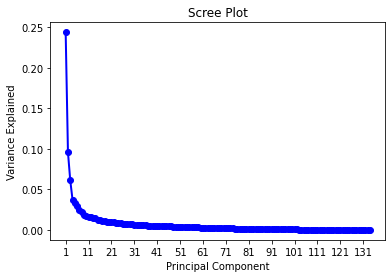

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

PC_values = np.arange(Covariance_matrix.n_components_) + 1
plt.plot(PC_values, Covariance_matrix.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.xticks(np.arange(min(PC_values), max(PC_values)+1, 10.0))
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
# matplotlib.axes.Axes.set_xscale(1, 'linear')
plt.show()

Text(0, 0.5, 'Variance Explained')

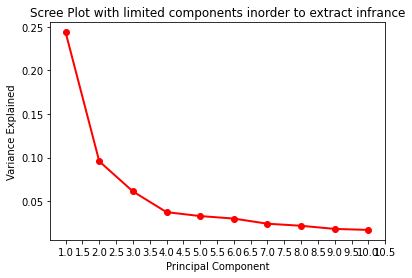

In [ ]:
pc_values_limited = PC_values[:10]
varicace_ratio_limited = Covariance_matrix.explained_variance_ratio_[:10]
plt.plot(pc_values_limited, varicace_ratio_limited, 'o-', linewidth=2, color='red')
plt.xticks(np.arange(min(PC_values), max(pc_values_limited)+1, 0.5))
plt.title('Scree Plot with limited components inorder to extract infrance')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')

In [ ]:
pca = PCA(n_components=7)
pca.fit(cust_prod)
pca_samples = pca.transform(cust_prod)

In [ ]:
ps = pd.DataFrame(pca_samples)
ps.head()

,0,1,2,3,4,5,6
0,-0.286251,1.005868,-1.030293,-0.898984,-0.587667,-0.998688,0.330579
1,-1.972748,-0.487659,-0.120542,0.213108,0.046050,-0.181729,-0.168578
2,-1.168974,1.284089,3.228124,0.594048,-0.648839,-1.091826,0.941659
3,-1.433967,1.250081,3.261985,1.237739,-0.353544,-0.346497,0.812486
4,-2.070709,-0.422148,-0.101552,0.278166,0.006063,-0.097302,0.025138


(25831, 2)
          0         1
0 -0.286251  1.005868
1 -1.972748 -0.487659
2 -1.168974  1.284089
3 -1.433967  1.250081
4 -2.070709 -0.422148


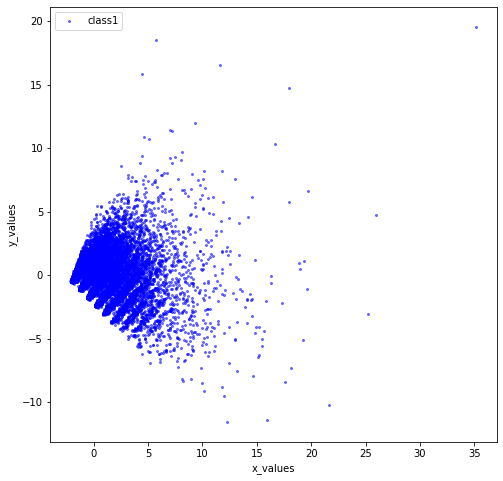

In [ ]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
tocluster = pd.DataFrame(ps[[0,1]])
print (tocluster.shape)
print (tocluster.head())

fig = plt.figure(figsize=(8,8))
plt.plot(tocluster[0], tocluster[1], 'o', markersize=2, color='blue', alpha=0.5, label='class1')

plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.show()

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

clusterer = KMeans(n_clusters=4,random_state=42).fit(tocluster)
centers = clusterer.cluster_centers_
c_preds = clusterer.predict(tocluster)
print(centers)

[[-1.3086094  -0.0959423 ]
 [ 7.32393164 -1.00277075]
 [ 1.87084713 -1.33040164]
 [ 1.44211835  1.98385533]]


In [ ]:
print (c_preds[0:100])

[0 0 0 0 0 0 0 0 0 2 2 0 0 0 0 3 0 0 3 0 0 0 0 0 0 1 1 0 0 3 3 0 2 2 2 0 0
 0 0 2 3 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 3 0 0 0 2 0 0 0 0 2 0 0 1 2 0 0 0 0
 3 3 2 0 0 0 0 0 3 0 0 0 2 3 0 0 0 0 0 3 0 0 0 1 0 0]


['orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'purple']


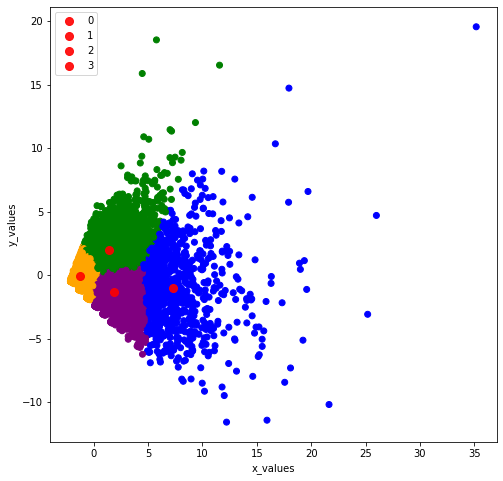

In [ ]:
import matplotlib
fig = plt.figure(figsize=(8,8))
colors = ['orange','blue','purple','green']
colored = [colors[k] for k in c_preds]
print (colored[0:10])
plt.scatter(tocluster[0],tocluster[1],  color = colored)
for ci,c in enumerate(centers):
    plt.plot(c[0], c[1], 'o', markersize=8, color='red', alpha=0.9, label=''+str(ci))

plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.show()

In [ ]:
clust_prod = cust_prod.copy()
clust_prod['cluster'] = c_preds

clust_prod.head(10)

aisle,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt,cluster
user_id,,,,,,,,,,,,,,,,,,,,,
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
23,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,4,0
27,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,4,0
36,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
42,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
66,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
67,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
70,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


(25831, 135)


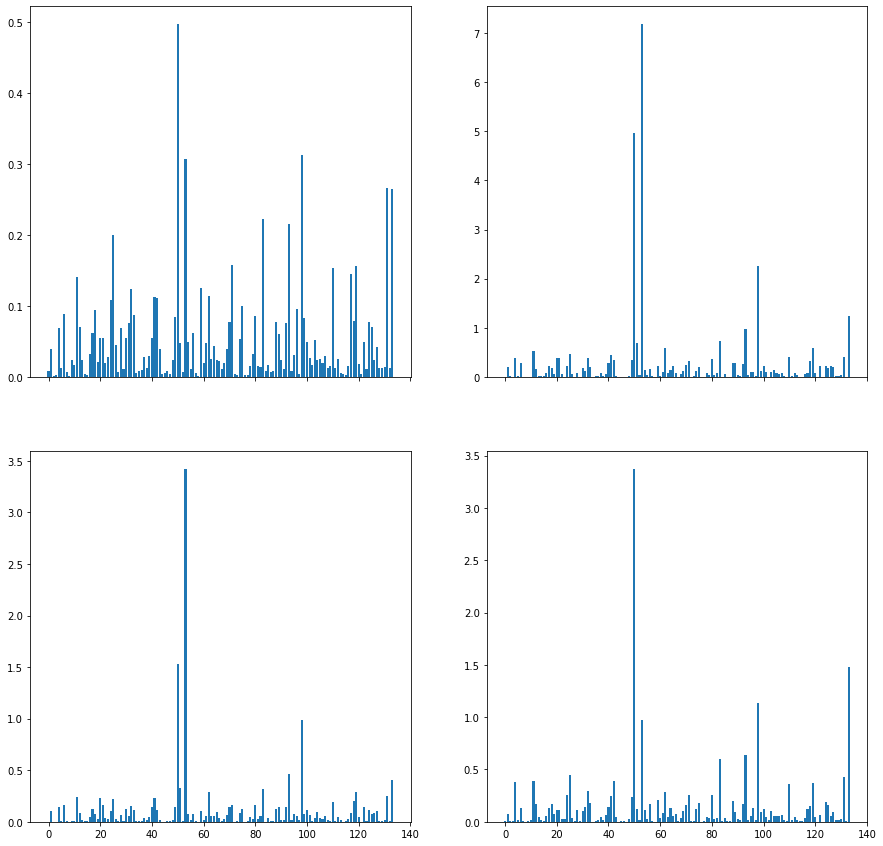

In [ ]:
print (clust_prod.shape)
f,arr = plt.subplots(2,2,sharex=True,figsize=(15,15))

c1_count = len(clust_prod[clust_prod['cluster']==0])

c0 = clust_prod[clust_prod['cluster']==0].drop('cluster',axis=1).mean()
arr[0,0].bar(range(len(clust_prod.drop('cluster',axis=1).columns)),c0)
c1 = clust_prod[clust_prod['cluster']==1].drop('cluster',axis=1).mean()
arr[0,1].bar(range(len(clust_prod.drop('cluster',axis=1).columns)),c1)
c2 = clust_prod[clust_prod['cluster']==2].drop('cluster',axis=1).mean()
arr[1,0].bar(range(len(clust_prod.drop('cluster',axis=1).columns)),c2)
c3 = clust_prod[clust_prod['cluster']==3].drop('cluster',axis=1).mean()
arr[1,1].bar(range(len(clust_prod.drop('cluster',axis=1).columns)),c3)
plt.show()


In [ ]:
c0.sort_values(ascending=False)[0:10]

aisle
fresh fruits                     0.497714
packaged vegetables fruits       0.313197
fresh vegetables                 0.307955
water seltzer sparkling water    0.266443
yogurt                           0.265468
milk                             0.223529
packaged cheese                  0.215544
chips pretzels                   0.199939
ice cream ice                    0.157635
soy lactosefree                  0.157208
dtype: float64

In [ ]:
c1.sort_values(ascending=False)[0:10]

aisle
fresh vegetables              7.178016
fresh fruits                  4.960117
packaged vegetables fruits    2.250973
yogurt                        1.241245
packaged cheese               0.971790
milk                          0.731518
fresh herbs                   0.684825
frozen produce                0.597276
soy lactosefree               0.585603
bread                         0.525292
dtype: float64

In [ ]:
c2.sort_values(ascending=False)[0:10]

aisle
fresh vegetables                 3.422353
fresh fruits                     1.528471
packaged vegetables fruits       0.982588
packaged cheese                  0.460000
yogurt                           0.401412
fresh herbs                      0.328235
milk                             0.315765
soy lactosefree                  0.291294
frozen produce                   0.288000
water seltzer sparkling water    0.252706
dtype: float64

In [ ]:
c3.sort_values(ascending=False)[0:10]

aisle
fresh fruits                     3.373915
yogurt                           1.480231
packaged vegetables fruits       1.130906
fresh vegetables                 0.971070
packaged cheese                  0.637175
milk                             0.601013
chips pretzels                   0.451302
water seltzer sparkling water    0.425747
energy granola bars              0.394166
bread                            0.387657
dtype: float64

In [ ]:
from IPython.display import display, HTML
cluster_means = [[c0['fresh fruits'],c0['fresh vegetables'],c0['packaged vegetables fruits'], c0['yogurt'], c0['packaged cheese'], c0['milk'],c0['water seltzer sparkling water'],c0['chips pretzels']],
                 [c1['fresh fruits'],c1['fresh vegetables'],c1['packaged vegetables fruits'], c1['yogurt'], c1['packaged cheese'], c1['milk'],c1['water seltzer sparkling water'],c1['chips pretzels']],
                 [c2['fresh fruits'],c2['fresh vegetables'],c2['packaged vegetables fruits'], c2['yogurt'], c2['packaged cheese'], c2['milk'],c2['water seltzer sparkling water'],c2['chips pretzels']],
                 [c3['fresh fruits'],c3['fresh vegetables'],c3['packaged vegetables fruits'], c3['yogurt'], c3['packaged cheese'], c3['milk'],c3['water seltzer sparkling water'],c3['chips pretzels']]]
cluster_means = pd.DataFrame(cluster_means, columns = ['fresh fruits','fresh vegetables','packaged vegetables fruits','yogurt','packaged cheese','milk','water seltzer sparkling water','chips pretzels'])
HTML(cluster_means.to_html())

,fresh fruits,fresh vegetables,packaged vegetables fruits,yogurt,packaged cheese,milk,water seltzer sparkling water,chips pretzels
0,0.497714,0.307955,0.313197,0.265468,0.215544,0.223529,0.266443,0.199939
1,4.960117,7.178016,2.250973,1.241245,0.971790,0.731518,0.411479,0.460117
2,1.528471,3.422353,0.982588,0.401412,0.460000,0.315765,0.252706,0.224941
3,3.373915,0.971070,1.130906,1.480231,0.637175,0.601013,0.425747,0.451302
